In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Yeast\Yeast_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,NaN,NaN,0.47,NaN,0.5,0.0,NaN,0.22
1,NaN,0.67,NaN,0.27,0.5,0.0,NaN,NaN
2,0.64,NaN,NaN,NaN,0.5,0.0,0.53,NaN
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1479,0.82,NaN,NaN,0.18,NaN,0.0,0.50,NaN
1480,0.35,NaN,NaN,0.14,NaN,0.0,0.54,NaN
1481,NaN,0.47,NaN,NaN,NaN,0.0,0.53,0.37
1482,0.51,NaN,NaN,NaN,0.5,0.0,0.59,NaN


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	297
float64		column 2	370
float64		column 3	445
float64		column 4	370
float64		column 5	148
float64		column 6	0
float64		column 7	297
float64		column 8	445


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,1187.000000,1114.000000,1039.000000,1114.000000,1336.000000,1484.000000,1187.000000,1039.000000
mean,0.496512,0.497756,0.498903,0.261203,0.504865,0.007500,0.498964,0.274350
std,0.130210,0.120471,0.085354,0.133505,0.049100,0.075683,0.057777,0.103401
min,0.110000,0.130000,0.210000,0.050000,0.500000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.455000,0.170000,0.500000,0.000000,0.480000,0.220000
50%,0.480000,0.490000,0.510000,0.220000,0.500000,0.000000,0.510000,0.220000
75%,0.570000,0.570000,0.550000,0.327500,0.500000,0.000000,0.530000,0.300000
max,0.950000,1.000000,1.000000,0.820000,1.000000,0.830000,0.720000,1.000000


<AxesSubplot:>

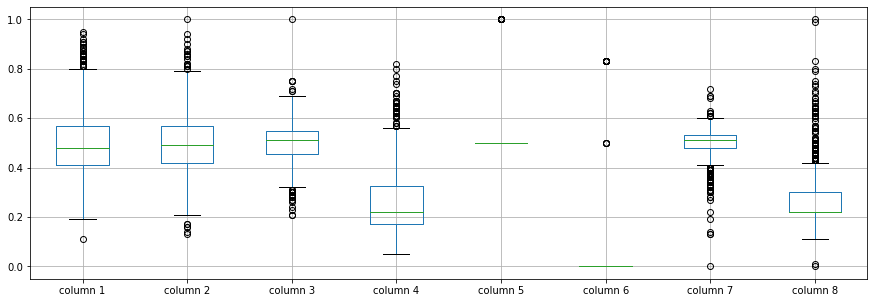

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    0.496512
column 2    0.497756
column 3    0.498903
column 4    0.261203
column 5    0.504865
column 6    0.007500
column 7    0.498964
column 8    0.274350
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.482394,-0.155581,0.118526,-0.000829,0.004501,0.037060,-0.114822
column 2,0.482394,1.000000,-0.238889,0.116449,0.051029,0.007757,0.111941,-0.080373
column 3,-0.155581,-0.238889,1.000000,0.041982,0.024802,0.002528,-0.152483,-0.024642
column 4,0.118526,0.116449,0.041982,1.000000,-0.004243,0.017344,-0.084421,-0.044935
column 5,-0.000829,0.051029,0.024802,-0.004243,1.000000,-0.009996,0.043411,0.025290
column 6,0.004501,0.007757,0.002528,0.017344,-0.009996,1.000000,0.016733,-0.036134
column 7,0.037060,0.111941,-0.152483,-0.084421,0.043411,0.016733,1.000000,0.078991
column 8,-0.114822,-0.080373,-0.024642,-0.044935,0.025290,-0.036134,0.078991,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+55,8+55+55,8+55+55+55,8+55+55+55+55,8+55+55+55+55+55,8+55+55+55+55+55+55,8+55+55+55+55+55,8+55+55+55+55,8+55+55+55,8+55+55,8+55,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 2.2623780706654424
Epoch: 1 , loss: 1.9071651295475338
Epoch: 2 , loss: 1.7639452257881993
Epoch: 3 , loss: 1.6575586692146633
Epoch: 4 , loss: 1.5506071279878202
Epoch: 5 , loss: 1.4747037459974703
Epoch: 6 , loss: 1.4035767964694812
Epoch: 7 , loss: 1.3636269692493521
Epoch: 8 , loss: 1.279609379561051
Epoch: 9 , loss: 1.2494890974915547
Epoch: 10 , loss: 1.2211074207140051
Epoch: 11 , loss: 1.1591840075409932
Epoch: 12 , loss: 1.1428298386542692
Epoch: 13 , loss: 1.0986397182163985
Epoch: 14 , loss: 1.0801183076008507
Epoch: 15 , loss: 1.0508059930542242
Epoch: 16 , loss: 1.0234201906815819
Epoch: 17 , loss: 1.0186341988003773
Epoch: 18 , loss: 0.994717640073403
Epoch: 19 , loss: 0.956917233441187
Epoch: 20 , loss: 0.9607527424459872
Epoch: 21 , loss: 0.9377982959799145
Epoch: 22 , loss: 0.9417102855184804
Epoch: 23 , loss: 0.9118806156127349
Epoch: 24 , loss: 0.9085580583499826
Epoch: 25 , loss: 0.9

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(1484, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    0.43
column 2    0.44
column 3    0.48
column 4    0.22
column 5    0.50
column 6    0.00
column 7    0.51
column 8    0.22
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Yeast.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,-0.175280,-0.207301,0.000000,0.083058,0.000000,0.0,-0.059681,0.000000
1,0.112267,0.000000,0.050876,0.000000,0.000000,0.0,0.014647,0.063723
2,0.000000,-0.331703,-0.194770,0.013397,0.000000,0.0,0.000000,-0.038013
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
1479,0.000000,-0.222842,-0.063133,0.000000,-0.085369,0.0,0.000000,0.009967
1480,0.000000,0.133617,-0.033978,0.000000,-0.061612,0.0,0.000000,-0.426051
1481,-0.157527,0.000000,-0.249445,-0.001788,-0.236484,0.0,0.000000,0.000000
1482,0.000000,0.074969,-0.086051,0.018258,0.000000,0.0,0.000000,0.066949


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(8.0695937421173, 46.90414374018569)

In [17]:
NRMS=numerator/denominator
NRMS


0.17204436748311383

In [18]:
new_df.iloc[66,:]

column 1    0.460000
column 2    0.546341
column 3    0.551670
column 4    0.274051
column 5    0.500000
column 6    0.000000
column 7    0.440000
column 8    0.292680
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.404720,0.402699,0.470000,0.213058,0.500000,0.0,0.420319,0.220000
1,0.542267,0.670000,0.530876,0.270000,0.500000,0.0,0.544647,0.283723
2,0.640000,0.288297,0.295230,0.163397,0.500000,0.0,0.530000,0.181987
3,0.580000,0.440000,0.570000,0.130000,0.500000,0.0,0.540000,0.220000
4,0.420000,0.440000,0.480000,0.540000,0.500000,0.0,0.480000,0.220000
...,...,...,...,...,...,...,...,...
1479,0.820000,0.407158,0.406867,0.180000,0.414631,0.0,0.500000,0.229967
1480,0.350000,0.423617,0.426022,0.140000,0.438388,0.0,0.540000,0.233949
1481,0.252473,0.470000,0.250555,0.138212,0.263516,0.0,0.530000,0.370000
1482,0.510000,0.524969,0.533949,0.268258,0.500000,0.0,0.590000,0.286949


In [20]:
imputations[-1].to_excel("Yeast_AL_20(imp).xlsx", index=False, header=False)